In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

* If structured data (CSV's) use ensemble methods
* If unstructured data (Audio, image) use deep/transfer learning

# 1. Getting data ready

1. Split data into X and y
2. Fill/imputate/remove missing values
3. Convert non-numerical to numerical (feature encoding)
4. Check correlation analysis: features that are highly correlated can be taken away one by one (Forward/Backward attribute selection)

In [3]:
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [4]:
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Honda'

### One Hot Encode categorical features

In [17]:
car_sales['Doors'].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [19]:
car_sales['Make'].value_counts()

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64

In [18]:
car_sales['Colour'].value_counts()

White    407
Blue     321
Black     99
Red       94
Green     79
Name: Colour, dtype: int64

In [20]:
# Total 13 columns should be produced once one hot encoded (Odometer included)

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [('one_hot', one_hot, categorical_features)],
    remainder='passthrough'  # don't do anything to Odometer column
)

transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [22]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [23]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [24]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3385921048142325

### Handle data with missing values

In [49]:
car_sales_missing = pd.read_csv('car-sales-extended-missing.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [27]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [29]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [35]:
print(X.isna().sum())
print('')
print(y.isna().sum())

Make             49
Colour           50
Odometer (KM)    50
Doors            50
dtype: int64

50


In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [('one_hot', one_hot, categorical_features)],
    remainder='passthrough'
)

transformed_X = transformer.fit_transform(car_sales_missing)
pd.DataFrame(transformed_X)

# Result has one hot encoded the "" value

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
995,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
996,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
997,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
998,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


In [51]:
# Fill missing categorical values with extra category (Not possible to take mean)
car_sales_missing['Make'].fillna('missing', inplace=True)
car_sales_missing['Colour'].fillna('missing', inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Fill doors with value that occurs the most
car_sales_missing['Doors'].fillna(4, inplace=True)

In [52]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [53]:
# Remove rows with missing labels (Not practical to predict the prediction)
car_sales_missing.dropna(inplace=True)

In [54]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [55]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [56]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [('one_hot', one_hot, categorical_features)],
    remainder='passthrough'
)

transformed_X = transformer.fit_transform(car_sales_missing)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


In [72]:
# Secondary method
car_sales_missing = pd.read_csv('car-sales-extended-missing.csv')
car_sales_missing.dropna(subset=['Price'], inplace=True)

In [73]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [74]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

category_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
numerical_imputer = SimpleImputer(strategy='mean')

imputer = ColumnTransformer([
    ('category_imputer', category_imputer, ['Make', 'Colour']),
    ('door_imputer', door_imputer, ['Doors']),
    ('numerical_imputer', numerical_imputer, ['Odometer (KM)']),
])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [75]:
car_sales_filled = pd.DataFrame(filled_X, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])

In [76]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [78]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer(
    [('one_hot', one_hot, categorical_features)],
    remainder='passthrough'
)

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [79]:
np.random.seed(0)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.1685441749554657

# 2. Picking the right model

<img src="https://scikit-learn.org/stable/_static/ml_map.png" />

### For a regression model

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
# There is an ethical issue with the above method
data_url = 'http://lib.stat.cmu.edu/datasets/boston'
feature_names = np.array([
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
])

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

boston_df = pd.DataFrame(data, columns=feature_names)
boston_df['target'] = target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
boston_df.size

7084

In [13]:
from sklearn.linear_model import Ridge
np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Ridge()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6662221670168522

In [6]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [14]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8654448653350507

In [15]:
from sklearn.ensemble import AdaBoostRegressor
np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = AdaBoostRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8402444860769022

### For a classification model

In [2]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
heart_disease.size

4242

In [23]:
from sklearn.svm import LinearSVC
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)

model.score(X_test, y_test)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.8688524590163934

In [25]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6885245901639344

In [26]:
from sklearn.svm import SVC
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = SVC()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7049180327868853

In [6]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8524590163934426

# 3. Create predictions

## For a regression model

In [3]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X_boston = boston_df.drop('target', axis=1)
y_boston = boston_df['target']

X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.2)

model_boston = RandomForestRegressor()
model_boston.fit(X_train_boston, y_train_boston)

model_boston.score(X_test_boston, y_test_boston)

0.8654448653350507

In [4]:
preds_boston = model_boston.predict(X_test_boston)

In [5]:
preds_boston

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

## For a classification model

In [9]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X_heart = heart_disease.drop('target', axis=1)
y_heart = heart_disease['target']

X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2)

model_heart = RandomForestClassifier()
model_heart.fit(X_train_heart, y_train_heart)

model_heart.score(X_test_heart, y_test_heart)

0.8524590163934426

In [10]:
preds_heart = model_heart.predict(X_test_heart)

In [11]:
proba_heart = model_heart.predict_proba(X_test_heart)

In [12]:
model_heart.predict(X_test_heart)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

# 4. Evaluate model

* Preferrable to use cross val score over the basic '.score'. This prevents luck (many info in train data than thought) from interferring (by doing K number of train test splits) - since the model is trained on all of the data
<img src='cross-val-score.png' />

In [12]:
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay, SCORERS, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [44]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

*Regression*

In [15]:
model_boston.score(X_test_boston, y_test_boston)

0.8654448653350507

In [29]:
np.random.seed(42)
boston_cross_val_score = cross_val_score(model_boston, X_train_boston, y_train_boston)

In [30]:
boston_cross_val_score

array([0.83009512, 0.73363209, 0.84615926, 0.89213043, 0.79749028])

In [35]:
np.random.seed(42)
np.mean(boston_cross_val_score)

0.8199014368836067

In [36]:
np.random.seed(42)
np.mean(cross_val_score(model_boston, X_train_boston, y_train_boston, scoring='r2'))

0.8199014368836067

In [41]:
np.random.seed(42)
np.mean(cross_val_score(model_boston, X_train_boston, y_train_boston, scoring='neg_mean_absolute_error'))

-2.4043282407407416

In [38]:
np.random.seed(42)
np.mean(cross_val_score(model_boston, X_train_boston, y_train_boston, scoring='neg_mean_squared_error'))

-15.40196105243827

*Classification*

In [17]:
model_heart.score(X_test_heart, y_test_heart)

0.8524590163934426

In [31]:
np.random.seed(42)
heart_cross_val_score = cross_val_score(model_heart, X_train_heart, y_train_heart)

In [32]:
heart_cross_val_score

array([0.79591837, 0.7755102 , 0.77083333, 0.8125    , 0.8125    ])

In [33]:
np.random.seed(42)
np.mean(heart_cross_val_score)

0.7934523809523809

In [23]:
# Default scorer of model is accuracy - therefore the above and this should be same
np.random.seed(42)
np.mean(cross_val_score(model_heart, X_train_heart, y_train_heart, scoring='accuracy'))

0.7934523809523809

In [24]:
np.mean(cross_val_score(model_heart, X_train_heart, y_train_heart, scoring='precision'))

0.818350334212403

In [25]:
np.mean(cross_val_score(model_heart, X_train_heart, y_train_heart, scoring='recall'))

0.8188034188034188

In [26]:
np.mean(cross_val_score(model_heart, X_train_heart, y_train_heart, scoring='f1'))

0.8356036556036557

### For a classification-specific model

* Accuracy
* AUC/ROC Curve - comparison of a model's TP rate vs the FP rate
* Confusion Matrix
* Classification Report

In [73]:
model_heart_cross_accuracy = np.mean(heart_cross_val_score)
f'{model_heart_cross_accuracy * 100:.3f}%'

'81.412%'

In [80]:
proba_heart[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [81]:
proba_heart[:5,1]

array([0.11, 0.51, 0.57, 0.16, 0.82])

In [83]:
fpr, tpr, thresholds = roc_curve(y_test_heart, proba_heart[:,1])

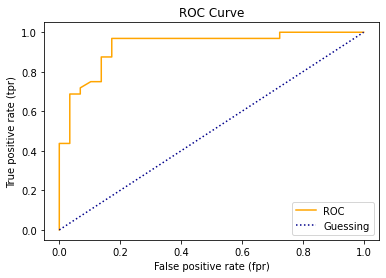

In [93]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    # ROC curvea
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Just a linear line
    plt.plot([0, 1], [0, 1], color='darkblue', label='Guessing', linestyle=':')
    
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [121]:
roc_auc_score_heart = roc_auc_score(y_test_heart, proba_heart[:,1])
roc_auc_score_heart

0.9304956896551724

In [122]:
plot_roc_heart = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score_heart)

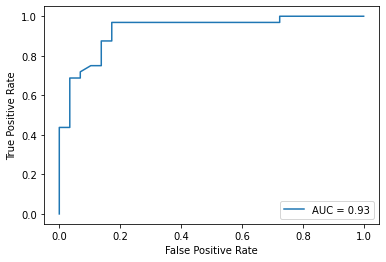

In [123]:
plot_roc_heart.plot();

In [111]:
confusion_heart = confusion_matrix(y_test_heart, preds_heart)
confusion_heart

array([[24,  5],
       [ 4, 28]], dtype=int64)

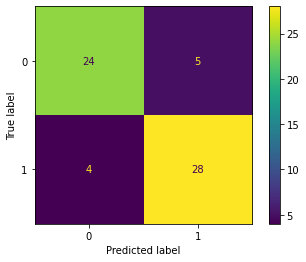

In [119]:
plot_confusion_heart = ConfusionMatrixDisplay(confusion_heart)
plot_confusion_heart.plot();

<img src='classification-report-anatomy.png' />

In [124]:
print(classification_report(y_test_heart, preds_heart))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### For a regression-specific model
* R-squared/coefficient of determination - amount of variance in predictions
* Mean Absolute Error (MAE) - Avg of absolute differences
* Mean Squared Error (MSE) - Avg of squared differences

<img src="regression-evaluation.png" />

In [125]:
model_boston.score(X_test_boston, y_test_boston)

0.8654448653350507

In [128]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [127]:
r2_score(y_test_boston, preds_boston)

0.8654448653350507

In [129]:
mean_absolute_error(y_test_boston, preds_boston)

2.136382352941176

In [130]:
mean_squared_error(y_test_boston, preds_boston)

9.867437068627442

# 5. Improve model
* From a data perspective:
    * Could we improve the data? (any feature engineering)
    * Could we collect more data?
    
* From a model perspective:
    * Is there a better model/estimator we could use?
    * Could we improve current model's hyperparameters?

### Tuning Hyperparameters

*By Hand*
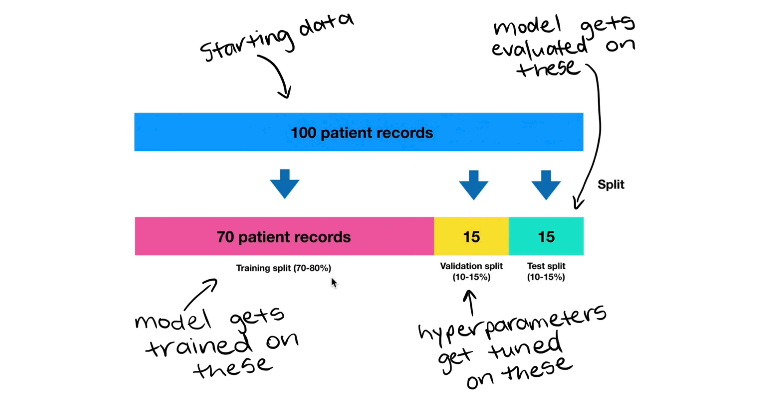

* Sklearn suggests to tune max_depth, max_features, min_samples, min_samples_leaf, estimators

In [45]:
model_heart.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [3]:
def evaluate_heart_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    metrics = { 'accuracy': accuracy, 'precision': precision, 'f1': f1, 'recall': recall }
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('F1: ', f1)
    print('Recall: ', recall)
    return metrics

In [53]:
evaluate_heart_preds(y_test_heart, preds_heart)

Accuracy:  0.8524590163934426
Precision:  0.8484848484848485
F1:  0.8615384615384615
Recall:  0.875


In [4]:
# Split to train, test, validation sets
np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)
heart_disease_shuffled_X = heart_disease_shuffled.drop('target', axis=1)
heart_disease_shuffled_y = heart_disease_shuffled['target']

heart_disease_shuffled_train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
heart_disease_shuffled_valid_split = round(heart_disease_shuffled_train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data

heart_disease_shuffled_X_train, heart_disease_shuffled_y_train = heart_disease_shuffled_X[:heart_disease_shuffled_train_split], heart_disease_shuffled_y[:heart_disease_shuffled_train_split]
heart_disease_shuffled_X_valid, heart_disease_shuffled_y_valid = heart_disease_shuffled_X[heart_disease_shuffled_train_split: heart_disease_shuffled_valid_split], heart_disease_shuffled_y[heart_disease_shuffled_train_split:heart_disease_shuffled_valid_split]
heart_disease_shuffled_X_test, heart_disease_shuffled_y_test = heart_disease_shuffled_X[heart_disease_shuffled_valid_split:], heart_disease_shuffled_y[heart_disease_shuffled_valid_split:]

len(heart_disease_shuffled_X_train), len(heart_disease_shuffled_X_valid), len(heart_disease_shuffled_X_test)

(212, 45, 46)

In [56]:
model_heart_shuffled = RandomForestClassifier()
model_heart_shuffled.fit(heart_disease_shuffled_X_train, heart_disease_shuffled_y_train)

# Use the validation data to check and improve, and only once satisfied predict on the test set
preds_heart_shuffled = model_heart_shuffled.predict(heart_disease_shuffled_X_valid)
evaluate_heart_preds(heart_disease_shuffled_y_valid, preds_heart_shuffled)

Accuracy:  0.8222222222222222
Precision:  0.8148148148148148
F1:  0.8461538461538461
Recall:  0.88


In [57]:
np.random.seed(42)
model_heart_shuffled = RandomForestClassifier(max_depth=10)
model_heart_shuffled.fit(heart_disease_shuffled_X_train, heart_disease_shuffled_y_train)

preds_heart_shuffled = model_heart_shuffled.predict(heart_disease_shuffled_X_valid)
evaluate_heart_preds(heart_disease_shuffled_y_valid, preds_heart_shuffled)

Accuracy:  0.8
Precision:  0.8076923076923077
F1:  0.8235294117647058
Recall:  0.84


*By sklearn functions*

In [9]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)

grid = {
    'n_estimators': [10, 100, 500, 1000, 1200],
    'max_depth': [None, 5, 10, 20, 30],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

shuffled_rscv_X = heart_disease_shuffled.drop('target', axis=1)
shuffled_rscv_y = heart_disease_shuffled['target']

shuffled_rscv_X_train, shuffled_rscv_X_test, shuffled_rscv_y_train, shuffled_rscv_y_test = train_test_split(shuffled_rscv_X, shuffled_rscv_y, test_size=0.2)

model_heart_randomized = RandomForestClassifier(n_jobs=1)
model_heart_randomized_scv = RandomizedSearchCV(
    estimator=model_heart_randomized,
    param_distributions=grid,
    n_iter=10,
    cv=5,
    verbose=2
)

model_heart_randomized_scv.fit(shuffled_rscv_X_train, shuffled_rscv_y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total ti

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 500, 1000,
                                                         1200]},
                   verbose=2)

In [10]:
model_heart_randomized_scv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5}

In [13]:
model_heart_randomized_scv_preds = model_heart_randomized_scv.predict(shuffled_rscv_X_test)
rscv_preds = evaluate_heart_preds(shuffled_rscv_y_test, model_heart_randomized_scv_preds)

Accuracy:  0.8360655737704918
Precision:  0.78125
F1:  0.8333333333333334
Recall:  0.8928571428571429


In [14]:
# Difference between this and randomized is that this is brute-force (goes thru every possible combination)
# Whilst we can control the amount of iters in randomized
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

grid = {
    'n_estimators': [1200],
    'max_depth': [5],
    'max_features': ['sqrt'],
    'min_samples_split': [4],
    'min_samples_leaf': [4]
}

shuffled_gscv_X = heart_disease_shuffled.drop('target', axis=1)
shuffled_gscv_y = heart_disease_shuffled['target']

shuffled_gscv_X_train, shuffled_gscv_X_test, shuffled_gscv_y_train, shuffled_gscv_y_test = train_test_split(shuffled_gscv_X, shuffled_gscv_y, test_size=0.2)

model_heart_grid = RandomForestClassifier(n_jobs=1)
model_heart_grid_scv = GridSearchCV(
    estimator=model_heart_randomized,
    param_grid=grid,
    cv=5,
    verbose=2
)

model_heart_grid_scv.fit(shuffled_gscv_X_train, shuffled_gscv_y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   2.8s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [5], 'max_features': ['sqrt'],
                         'min_samples_leaf': [4], 'min_samples_split': [4],
                         'n_estimators': [1200]},
             verbose=2)

In [15]:
model_heart_grid_scv.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 1200}

In [16]:
model_heart_grid_scv_preds = model_heart_grid_scv.predict(shuffled_gscv_X_test)
gscv_preds = evaluate_heart_preds(shuffled_gscv_y_test, model_heart_grid_scv_preds)

Accuracy:  0.8360655737704918
Precision:  0.78125
F1:  0.8333333333333334
Recall:  0.8928571428571429


In [90]:
baseline_preds = evaluate_heart_preds(shuffled_gscv_y_test, preds_heart)

Accuracy:  0.45901639344262296
Precision:  0.42424242424242425
F1:  0.4590163934426229
Recall:  0.5


In [91]:
baseline_preds

{'accuracy': 0.45901639344262296,
 'precision': 0.42424242424242425,
 'f1': 0.4590163934426229,
 'recall': 0.5}

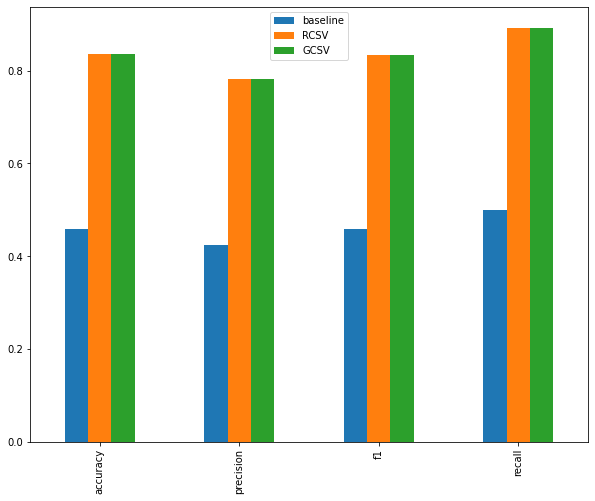

In [93]:
compare_scvs = pd.DataFrame({
    'baseline': baseline_preds,
    'RCSV': rscv_preds,
    'GCSV': gscv_preds
})

compare_scvs.plot.bar(figsize=(10, 8));

# Save & load model

*With pickle*

In [17]:
import pickle

pickle.dump(model_heart_grid_scv, open('grid-search-random-forest.pkl', 'wb'))

In [20]:
loaded_model_heart_grid_scv = pickle.load(open('grid-search-random-forest.pkl', 'rb'))

In [22]:
evaluate_heart_preds(shuffled_gscv_y_test, loaded_model_heart_grid_scv.predict(shuffled_gscv_X_test))

Accuracy:  0.8360655737704918
Precision:  0.78125
F1:  0.8333333333333334
Recall:  0.8928571428571429


{'accuracy': 0.8360655737704918,
 'precision': 0.78125,
 'f1': 0.8333333333333334,
 'recall': 0.8928571428571429}

*With joblib*

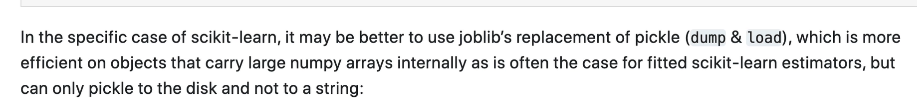

In [23]:
import joblib

joblib.dump(model_heart_grid_scv, open('grid-search-random-forest.joblib', 'wb'))

In [24]:
loaded_model_heart_grid_scv = joblib.load(open('grid-search-random-forest.joblib', 'rb'))

In [25]:
evaluate_heart_preds(shuffled_gscv_y_test, loaded_model_heart_grid_scv.predict(shuffled_gscv_X_test))

Accuracy:  0.8360655737704918
Precision:  0.78125
F1:  0.8333333333333334
Recall:  0.8928571428571429


{'accuracy': 0.8360655737704918,
 'precision': 0.78125,
 'f1': 0.8333333333333334,
 'recall': 0.8928571428571429}

# Putting it all together

In [26]:
car_sales_missing = pd.read_csv('car-sales-extended-missing.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


*Steps using an sklearn pipeline (collection of transformers)*
1. Fill missing data
2. Convert data to numbers
3. Build model

In [37]:
np.random.seed(42)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Drop rows with missing targets
car_sales_missing.dropna(subset=['Price'], inplace=True)

# Create transformer pipeline to handle imputation & one-hot-encoding of categorical features
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[
    ('impute_categorical', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one-hot-encode-categorical', OneHotEncoder(handle_unknown='ignore'))
])
# Create transformer pipeline to handle imputation of doors
door_features = ['Doors']
door_transformer = Pipeline(steps=[
    ('impute_door', SimpleImputer(strategy='constant', fill_value=4)),
])
# Create transformer pipeline to handle imputation of numeric features
numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('impute_numeric', SimpleImputer(strategy='mean')),
])

# Create preprocessor that will perform above transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat_transformer', categorical_transformer, categorical_features),
        ('door_transformer', door_transformer, door_features),
        ('numeric_transformer', numeric_transformer, numeric_features)
    ]
)

# Create pipeline that will execute the preprocessing pipeline, and use that for the model
car_sales_model = Pipeline(steps=[
    ('preprocessor_car_sales_data', preprocessor),
    ('car_sales_model', RandomForestRegressor())
])


car_sales_X = car_sales_missing.drop('Price', axis=1)
car_sales_y = car_sales_missing['Price']
car_sales_X_train, car_sales_X_test, car_sales_y_train, car_sales_y_test = train_test_split(car_sales_X, car_sales_y, test_size=0.2)

car_sales_model.fit(car_sales_X_train, car_sales_y_train)
car_sales_model.score(car_sales_X_test, car_sales_y_test)

0.22188417408787875

*Regression pipeline with GSCV (Obv or RSCV)*

In [39]:
# Syntax
pipe_grid = {
     # Preprocessor's numeric_transformer step -> impute_numeric step and adjust strategy
    'preprocessor_car_sales_data__numeric_transformer__impute_numeric__strategy': ['mean', 'median'],
    
     # Access n_estimators, max_depth, max_features, min_samples_split of the model
     # This is done cuz we need to access the RandomForest model and adjust it within
     # In the first GSCV example we simply passed the param to tune since the model itself was passed
     # but, in this case, it is a pipeline
    'car_sales_model__n_estimators': [1000],
    'car_sales_model__max_depth': [5],
    'car_sales_model__max_features': ['auto'],
    'car_sales_model__min_samples_split': [2, 4],
}

car_sales_gscv = GridSearchCV(car_sales_model, pipe_grid, cv=5, verbose=2)
car_sales_gscv.fit(car_sales_X_train, car_sales_y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END car_sales_model__max_depth=5, car_sales_model__max_features=auto, car_sales_model__min_samples_split=2, car_sales_model__n_estimators=1000, preprocessor_car_sales_data__numeric_transformer__impute_numeric__strategy=mean; total time=   2.7s
[CV] END car_sales_model__max_depth=5, car_sales_model__max_features=auto, car_sales_model__min_samples_split=2, car_sales_model__n_estimators=1000, preprocessor_car_sales_data__numeric_transformer__impute_numeric__strategy=mean; total time=   2.9s
[CV] END car_sales_model__max_depth=5, car_sales_model__max_features=auto, car_sales_model__min_samples_split=2, car_sales_model__n_estimators=1000, preprocessor_car_sales_data__numeric_transformer__impute_numeric__strategy=mean; total time=   2.7s
[CV] END car_sales_model__max_depth=5, car_sales_model__max_features=auto, car_sales_model__min_samples_split=2, car_sales_model__n_estimators=1000, preprocessor_car_sales_data__numeric_transfo

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor_car_sales_data',
                                        ColumnTransformer(transformers=[('cat_transformer',
                                                                         Pipeline(steps=[('impute_categorical',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('one-hot-encode-categorical',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                

In [36]:
car_sales_gscv.best_params_

{'car_sales_model__max_depth': 5,
 'car_sales_model__max_features': 'auto',
 'car_sales_model__min_samples_split': 2,
 'car_sales_model__n_estimators': 1000,
 'preprocessor_car_sales_data__numeric_transformer__impute__strategy': 'mean'}

In [33]:
car_sales_gscv.score(car_sales_X_test, car_sales_y_test)

0.3362918478561273